# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Data Processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

## Machine Learning Algos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

##
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, multilabel_confusion_matrix, classification_report

# Import data

In [2]:
#create dataframe from CSV

df = pd.read_csv("pitches.csv.zip")

# Data Cleaning

In [3]:
df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [4]:
df.shape

(2867154, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 40 columns):
px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code               object
type               object
pitch_type         object
event_num          int64
b_score            float64
ab_id              float64
b

In [6]:
df.describe()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
count,2.852965e+06,2.852965e+06,2.853040e+06,2.853040e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,...,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06
mean,6.572502e-03,2.254962e+00,8.838124e+01,8.136274e+01,1.731173e+03,1.802308e+02,5.848084e+00,6.601459e+00,2.381685e+01,-2.308512e+00,...,3.129711e+02,2.256608e+00,2.016606e+09,8.824259e-01,8.810873e-01,9.826033e-01,2.894472e+00,3.018314e-01,1.860451e-01,9.595543e-02
std,8.927490e-01,9.463968e-01,6.015540e+00,5.364057e+00,6.827521e+02,6.742859e+01,2.443621e+01,1.331708e+02,6.446540e-02,1.074066e+01,...,1.928482e+02,2.550955e+00,1.117238e+06,9.665457e-01,8.251786e-01,8.174947e-01,1.726595e+00,4.590526e-01,3.891431e-01,2.945302e-01
min,-1.054333e+01,-5.183664e+00,3.390000e+01,3.240000e+01,1.214000e+00,-2.000000e-03,-9.000000e+01,1.000000e-01,2.330000e+01,-5.929009e+01,...,3.000000e+00,0.000000e+00,2.015000e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.908243e-01,1.650000e+00,8.430000e+01,7.790000e+01,1.238745e+03,1.371540e+02,-1.190000e+01,4.300000e+00,2.380000e+01,-1.129000e+01,...,1.490000e+02,0.000000e+00,2.016004e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e-02,2.259000e+00,8.970000e+01,8.250000e+01,1.866322e+03,1.958850e+02,6.800000e+00,6.000000e+00,2.380000e+01,-3.142000e+00,...,3.020000e+02,1.000000e+00,2.017004e+09,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.090000e-01,2.863000e+00,9.300000e+01,8.540000e+01,2.247564e+03,2.252340e+02,2.700000e+01,8.000000e+00,2.390000e+01,5.995827e+00,...,4.640000e+02,3.000000e+00,2.018002e+09,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.295291e+01,1.488624e+01,1.050000e+02,9.690000e+01,6.539259e+03,3.600010e+02,2.694000e+02,2.248893e+05,3.640000e+01,4.097800e+01,...,1.336000e+03,2.500000e+01,2.018186e+09,4.000000e+00,2.000000e+00,2.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

px                 14189
pz                 14189
start_speed        14114
end_speed          14114
spin_rate          14189
spin_dir           14189
break_angle        14189
break_length       14189
break_y            14189
ax                 14189
ay                 14189
az                 14189
sz_bot              2083
sz_top              2083
type_confidence    14189
vx0                14189
vy0                14189
vz0                14189
x                      0
x0                 14189
y                      0
y0                 14189
z0                 14189
pfx_x              14142
pfx_z              14142
nasty              14189
zone               14189
code                5719
type                   0
pitch_type         14189
event_num              0
b_score                0
ab_id                  0
b_count                0
s_count                0
outs                   0
pitch_num              0
on_1b                  0
on_2b                  0
on_3b                  0


In [8]:
# drop all null values

df = df.dropna(how='any', axis=0)

In [9]:
df.shape

(2847250, 40)

In [10]:
df['pitch_type'].value_counts()

FF    1012917
SL     449804
FT     337244
CH     292123
SI     242047
CU     233913
FC     149376
KC      66410
FS      43533
KN      11260
IN       6187
EP        812
FO        810
PO        626
SC        113
UN         57
FA          9
AB          9
Name: pitch_type, dtype: int64

In [11]:
# change year column to string type

df['year'] = df.ab_id.astype(str)

In [12]:
# new dataframe with only 2018 pitches

new_df = df[df['year'].str.startswith('2018')]

In [13]:
new_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,year
2142710,0.239615,1.848781,93.7,84.5,2632.270,233.718,43.7,5.8,23.7,-19.911162,...,0.0,2.018000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2018000001.0
2142711,-0.804047,0.925201,94.0,85.8,2561.181,236.246,42.7,6.1,23.8,-20.043108,...,0.0,2.018000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2018000001.0
2142712,0.598637,1.616677,94.7,86.5,2673.854,237.996,44.4,6.0,23.8,-21.510485,...,0.0,2.018000e+09,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2018000001.0
2142713,1.453223,1.466314,82.3,76.7,959.909,38.861,-8.2,10.8,23.9,4.974062,...,0.0,2.018000e+09,1.0,2.0,0.0,4.0,0.0,0.0,0.0,2018000001.0
2142714,-0.427914,2.490041,95.4,87.1,2408.148,241.080,40.9,6.1,23.8,-20.172978,...,0.0,2.018000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,2018000001.0


In [14]:
new_df.shape

(718322, 41)

In [15]:
new_df['pitch_type'].value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [16]:
# drop fastball type and irrelevant types

new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='FF'].index)

In [17]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='FT'].index)

In [18]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='KN'].index)

In [19]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='EP'].index)

In [20]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='PO'].index)

In [21]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='FO'].index)

In [22]:
new_df = new_df.drop(new_df.loc[new_df['pitch_type']=='SC'].index)

In [23]:
final_df = new_df.drop(new_df.loc[new_df['pitch_type']=='AB'].index)

In [24]:
final_df['pitch_type'].value_counts()

SL    122796
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
Name: pitch_type, dtype: int64

In [25]:
# drop irrelevant features

final_df.drop(['code', 'type', 'event_num', 'b_score', 'b_count', 's_count', 
              'outs', 'pitch_num', 'type_confidence', 'on_1b', 'on_2b', 'on_3b'], axis=1, inplace=True)

In [26]:
final_df.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,y,y0,z0,pfx_x,pfx_z,nasty,zone,pitch_type,ab_id,year
2142710,0.239615,1.848781,93.7,84.5,2632.270,233.718,43.7,5.8,23.7,-19.911162,...,188.86,50.0,5.696240,-10.721801,7.870604,46.0,9.0,SI,2.018000e+09,2018000001.0
2142711,-0.804047,0.925201,94.0,85.8,2561.181,236.246,42.7,6.1,23.8,-20.043108,...,213.84,50.0,5.617264,-10.647298,7.115135,46.0,13.0,SI,2.018000e+09,2018000001.0
2142712,0.598637,1.616677,94.7,86.5,2673.854,237.996,44.4,6.0,23.8,-21.510485,...,195.28,50.0,5.646685,-11.206094,7.003230,53.0,9.0,SI,2.018000e+09,2018000001.0
2142713,1.453223,1.466314,82.3,76.7,959.909,38.861,-8.2,10.8,23.9,4.974062,...,199.22,50.0,5.768441,3.397188,-4.215796,22.0,14.0,SL,2.018000e+09,2018000001.0
2142714,-0.427914,2.490041,95.4,87.1,2408.148,241.080,40.9,6.1,23.8,-20.172978,...,171.57,50.0,5.726734,-10.308374,5.695114,36.0,4.0,SI,2.018000e+09,2018000001.0


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381485 entries, 2142710 to 2867149
Data columns (total 29 columns):
px              381485 non-null float64
pz              381485 non-null float64
start_speed     381485 non-null float64
end_speed       381485 non-null float64
spin_rate       381485 non-null float64
spin_dir        381485 non-null float64
break_angle     381485 non-null float64
break_length    381485 non-null float64
break_y         381485 non-null float64
ax              381485 non-null float64
ay              381485 non-null float64
az              381485 non-null float64
sz_bot          381485 non-null float64
sz_top          381485 non-null float64
vx0             381485 non-null float64
vy0             381485 non-null float64
vz0             381485 non-null float64
x               381485 non-null float64
x0              381485 non-null float64
y               381485 non-null float64
y0              381485 non-null float64
z0              381485 non-null float64
pf

In [28]:
# function to bin pitch types into binary classes

def bin_pitches(single_pitch):
    
    offspeed = ['CH', 'FS']
    breaking = ['SL', 'CU', 'KC']
    
    if single_pitch in offspeed:
        return 0
    elif single_pitch in breaking:
        return 1
    else:
        return 2  

In [29]:
# apply function to dataframe

final_df['bin_pitches'] = final_df.pitch_type.apply(bin_pitches)

In [30]:
final_df['bin_pitches'].value_counts()

1    199483
2     97031
0     84971
Name: bin_pitches, dtype: int64

In [31]:
# drop duplicates

final_df[['pitch_type', 'bin_pitches']].drop_duplicates(keep='first')

,pitch_type,bin_pitches
2142710,SI,2
2142713,SL,1
2142717,FC,2
2142730,CU,1
2142753,CH,0
2142905,FS,0
2143373,KC,1


In [32]:
final_df.shape

(381485, 30)

In [33]:
final_df.duplicated().sum()

0

In [34]:
# drop features that are no longer needed (used for sorting earlier)

final_df.drop(['pitch_type', 'ab_id', 'year'], axis=1, inplace=True)

# EDA

/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:627: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return f(x, *args, **kwargs)


bin_pitches
0    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
1    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
2    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
dtype: object

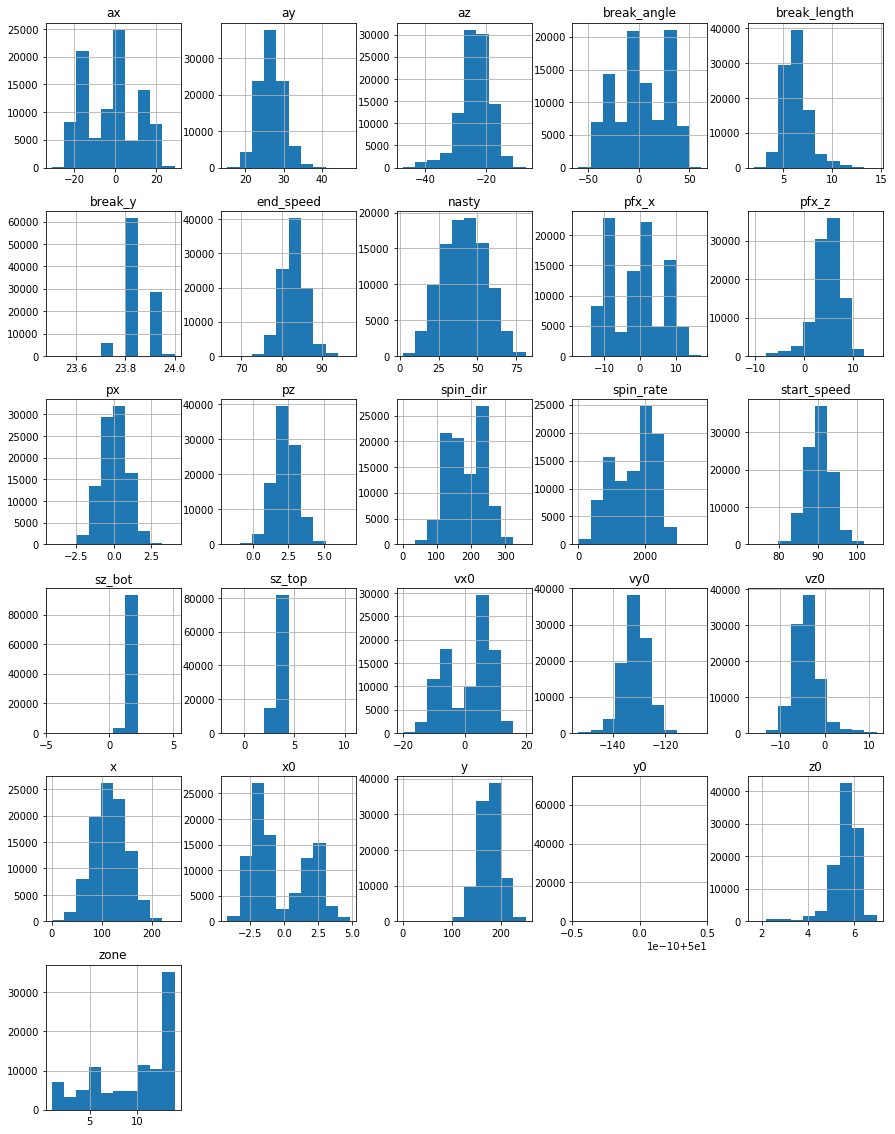

In [35]:
# visualize distribution of data in features

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
final_df.groupby('bin_pitches').hist(ax=ax)

In [36]:
# drop unecessary features

final_df.drop(['sz_top', 'sz_bot', 'y0'], axis=1, inplace=True)

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381485 entries, 2142710 to 2867149
Data columns (total 24 columns):
px              381485 non-null float64
pz              381485 non-null float64
start_speed     381485 non-null float64
end_speed       381485 non-null float64
spin_rate       381485 non-null float64
spin_dir        381485 non-null float64
break_angle     381485 non-null float64
break_length    381485 non-null float64
break_y         381485 non-null float64
ax              381485 non-null float64
ay              381485 non-null float64
az              381485 non-null float64
vx0             381485 non-null float64
vy0             381485 non-null float64
vz0             381485 non-null float64
x               381485 non-null float64
x0              381485 non-null float64
y               381485 non-null float64
z0              381485 non-null float64
pfx_x           381485 non-null float64
pfx_z           381485 non-null float64
nasty           381485 non-null float64
zo

In [38]:
final_df.shape

(381485, 24)

bin_pitches
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
2    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

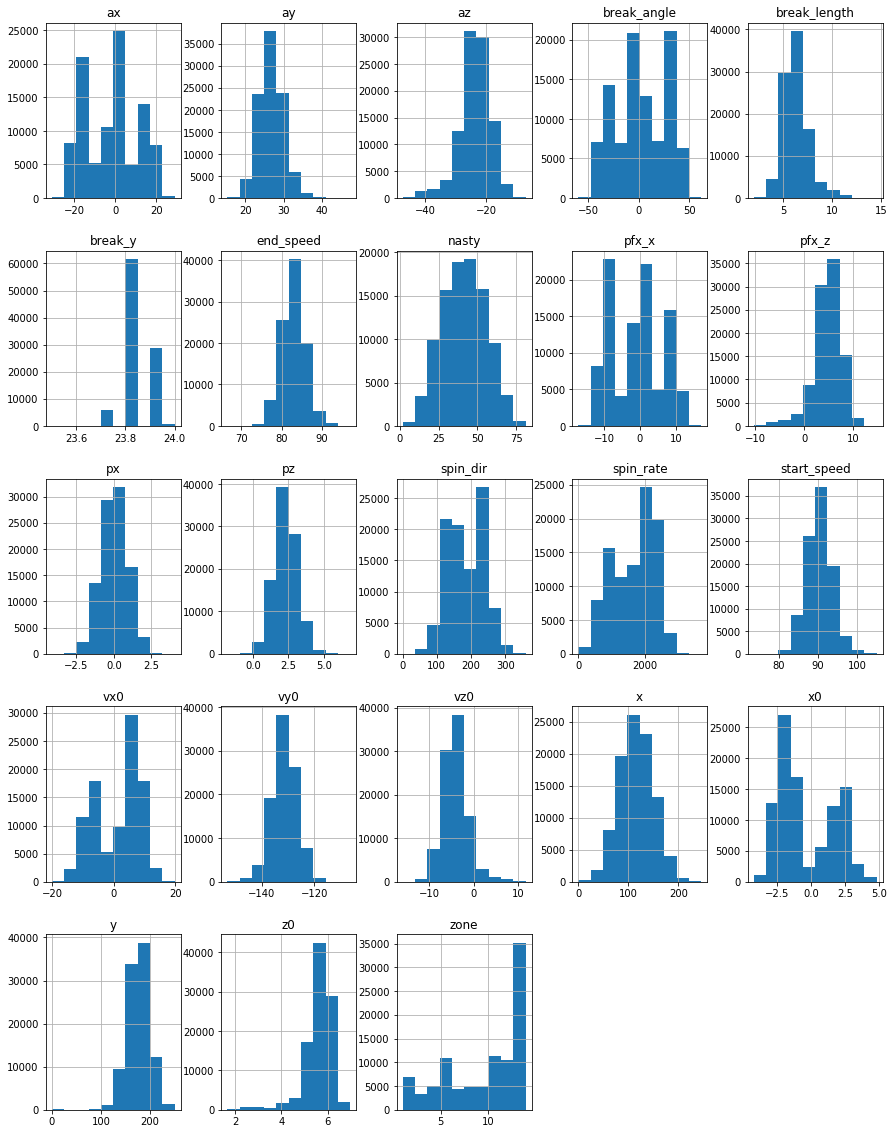

In [39]:
# visualize distribution of features again

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
final_df.groupby('bin_pitches').hist(ax=ax)

In [40]:
# set features variable

features = final_df.drop(['bin_pitches'], axis=1)

In [41]:
# drop outliers in features

features[(np.abs(stats.zscore(final_df)) < 3).all(axis=1)]

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,vy0,vz0,x,x0,y,z0,pfx_x,pfx_z,nasty,zone
2142710,0.239615,1.848781,93.7,84.5,2632.270,233.718,43.7,5.8,23.7,-19.911162,...,-136.134526,-7.015046,107.87,-0.869064,188.86,5.696240,-10.721801,7.870604,46.0,9.0
2142711,-0.804047,0.925201,94.0,85.8,2561.181,236.246,42.7,6.1,23.8,-20.043108,...,-136.551337,-9.145946,147.65,-0.942066,213.84,5.617264,-10.647298,7.115135,46.0,13.0
2142712,0.598637,1.616677,94.7,86.5,2673.854,237.996,44.4,6.0,23.8,-21.510485,...,-137.628790,-7.507958,94.10,-0.705522,195.28,5.646685,-11.206094,7.003230,53.0,9.0
2142713,1.453223,1.466314,82.3,76.7,959.909,38.861,-8.2,10.8,23.9,4.974062,...,-119.812434,-2.125677,61.60,-0.732282,199.22,5.768441,3.397188,-4.215796,22.0,14.0
2142714,-0.427914,2.490041,95.4,87.1,2408.148,241.080,40.9,6.1,23.8,-20.172978,...,-138.845494,-5.049660,133.31,-0.802268,171.57,5.726734,-10.308374,5.695114,36.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867132,-0.212890,1.587859,80.0,74.0,1209.602,327.322,7.9,12.2,23.9,-5.233581,...,-116.256407,-1.584788,125.12,1.490938,195.93,6.118648,-3.837512,-5.982271,36.0,13.0
2867134,-1.054564,0.142382,84.7,78.0,588.915,239.158,11.0,8.3,23.9,-4.283495,...,-122.902936,-5.315316,157.20,3.340541,234.94,4.848164,-2.800499,1.672213,36.0,13.0
2867139,0.676805,3.487355,83.0,77.0,447.145,225.040,7.0,7.9,23.9,-2.635429,...,-120.838586,2.278726,91.20,3.529359,144.63,5.094116,-1.748581,1.746085,49.0,12.0
2867141,-0.107080,0.886212,84.3,78.4,436.328,198.885,4.6,7.7,23.9,-1.194240,...,-122.670151,-3.970365,121.07,3.237666,214.77,4.933055,-0.772864,2.259083,42.0,13.0


In [42]:
final_df.shape

(381485, 24)

# Train_Test Split

In [43]:
X = features
y = final_df['bin_pitches']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [44]:
X_train.shape, y_train.shape, X_test.shape

((267039, 23), (267039,), (114446, 23))

In [45]:
X_train = X_train.select_dtypes(include='float')

### Reduce memory usage

In [46]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [47]:
reduce_mem_usage(X_train)

Mem. usage decreased to 13.75 Mb (71.9% reduction)


,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,vy0,vz0,x,x0,y,z0,pfx_x,pfx_z,nasty,zone
2605677,0.233276,2.427734,71.8750,66.8750,1182.0,334.75000,6.101562,14.500000,23.906250,-3.646484,...,-104.4375,2.447266,108.1250,2.705078,173.250,5.910156,-3.285156,-6.929688,30.0,5.0
2291133,-0.641113,2.660156,89.5000,82.3125,1805.0,224.37500,25.593750,5.601562,23.796875,-11.328125,...,-130.2500,-4.175781,141.5000,-1.916992,167.000,5.828125,-6.558594,6.710938,49.0,4.0
2471563,-0.230835,2.167969,93.0000,86.0000,1124.0,198.62500,4.800781,5.000000,23.906250,-3.335938,...,-135.2500,-5.300781,125.8125,-2.806641,180.250,5.691406,-1.782227,5.308594,27.0,5.0
2425192,-0.201660,2.546875,82.3750,76.0000,554.0,119.31250,-7.199219,8.398438,23.796875,3.998047,...,-120.0625,-1.821289,124.6875,-0.192017,170.000,5.964844,2.724609,1.529297,48.0,5.0
2327306,0.689941,2.246094,81.8125,75.3125,678.0,197.37500,1.700195,7.898438,23.796875,-1.660156,...,-118.8750,-4.273438,90.6875,-1.199219,178.125,6.511719,-1.162109,3.708984,35.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304265,0.307373,1.084961,80.3125,74.6250,1157.0,22.21875,-5.199219,12.203125,23.906250,3.517578,...,-116.6250,-3.654297,105.3125,-0.716309,209.500,6.515625,2.552734,-6.250000,13.0,14.0
2325897,0.110474,3.785156,87.8125,80.1250,1715.0,247.75000,25.296875,7.101562,23.796875,-13.960938,...,-127.6250,1.147461,112.8125,-1.992188,136.625,5.410156,-8.437500,3.457031,42.0,12.0
2531860,0.348877,0.850586,85.3750,78.6875,1943.0,233.87500,27.000000,6.898438,23.796875,-13.414062,...,-124.0625,-6.855469,103.6875,-1.595703,215.750,5.507812,-8.585938,6.281250,22.0,14.0
2335806,0.661621,0.875000,83.1875,77.8125,754.0,165.00000,-5.000000,7.300781,23.906250,1.628906,...,-121.0000,-7.023438,91.7500,-1.706055,215.125,6.058594,1.083008,4.039062,29.0,14.0


# Vanilla Models

### Logistic Regression

In [48]:
%%time

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_hat_train_log = logreg.predict(X_train)

/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 49.7 s, sys: 1 s, total: 50.7 s
Wall time: 51.7 s


In [49]:
log_acc = accuracy_score(y_train, y_hat_train_log)
log_pre = precision_score(y_train, y_hat_train_log, average='micro')
log_rec = recall_score(y_train, y_hat_train_log, average='macro')
log_f1 = f1_score(y_train, y_hat_train_log, average='weighted')

print(f'Accuracy: {log_acc}')
print(f'Precision: {log_pre}')
print(f'Recall: {log_rec}')
print(f'F1: {log_f1}')

Accuracy: 0.8637801969000782
Precision: 0.8637801969000782
Recall: 0.8413706483783115
F1: 0.8629655908760525


In [50]:
log_cv = np.mean(cross_val_score(logreg, X_train, y_train, cv=5))
print('CV5: ', log_cv)

/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "t

CV5:  0.8637577020430036


### Gaussian Naive Bayes

In [51]:
%%time

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_hat_train_gnb = gaussian.predict(X_train)

/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:183: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


CPU times: user 883 ms, sys: 134 ms, total: 1.02 s
Wall time: 987 ms


In [52]:
gnb_acc = accuracy_score(y_train, y_hat_train_gnb)
gnb_pre = precision_score(y_train, y_hat_train_gnb, average='micro')
gnb_rec = recall_score(y_train, y_hat_train_gnb, average='macro')
gnb_f1 = f1_score(y_train, y_hat_train_gnb, average='weighted')

print(f'Accuracy: {gnb_acc}')
print(f'Precision: {gnb_pre}')
print(f'Recall: {gnb_rec}')
print(f'F1: {gnb_f1}')

Accuracy: 0.22258172027306872
Precision: 0.22258172027306872
Recall: 0.3333333333333333
F1: 0.08104590699859811


/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
gnb_cv = np.mean(cross_val_score(gaussian, X_train, y_train, cv=5))
print('CV5: ', gnb_cv)

/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:183: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:183: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/jefflindberg/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:183: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, ke

CV5:  0.22258172018920014


### Random Forest

In [78]:
%%time

random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(X_train, y_train)
y_hat_train_rf = random_forest.predict(X_train)

CPU times: user 7.61 s, sys: 125 ms, total: 7.73 s
Wall time: 7.77 s


In [79]:
rf_acc = accuracy_score(y_train, y_hat_train_rf)
rf_pre = precision_score(y_train, y_hat_train_rf, average='micro')
rf_rec = recall_score(y_train, y_hat_train_rf, average='macro')
rf_f1 = f1_score(y_train, y_hat_train_rf, average='weighted')

print(f'Accuracy: {rf_acc}')
print(f'Precision: {rf_pre}')
print(f'Recall: {rf_rec}')
print(f'F1: {rf_f1}')

Accuracy: 0.9904882807380195
Precision: 0.9904882807380195
Recall: 0.9888633173485326
F1: 0.9904768650869346


In [80]:
rf_cv = np.mean(cross_val_score(random_forest, X_train, y_train, cv=5))
print('CV5: ', rf_cv)

CV5:  0.9190492603044775


### Feature Importance

In [81]:
feature_df = pd.DataFrame(random_forest.feature_importances_, index=X_train.columns)

In [82]:
feature_df.rename({0:'Score'}, axis=1, inplace=True)

In [83]:
feature_df = feature_df.sort_values(by='Score', ascending=False)

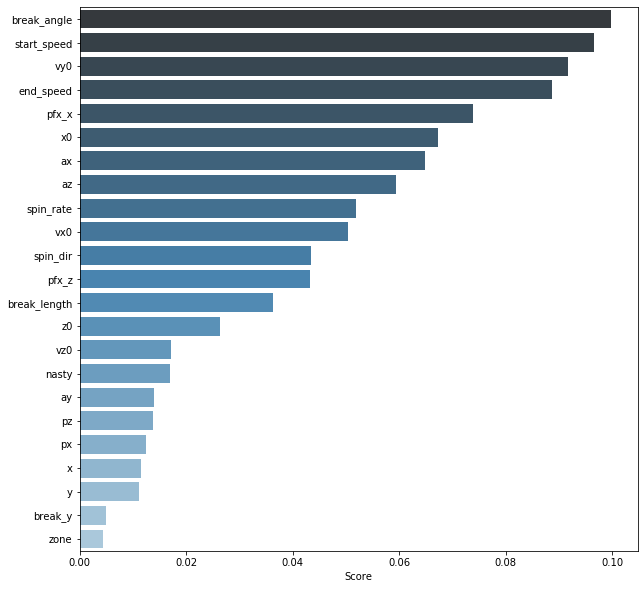

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(x='Score', y=feature_df.index, data=feature_df, orient='h', palette='Blues_d')

### Confusion Matrix

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 58989    116    333]
 [   118 138800    525]
 [   382   1066  66710]]


(2.5, -0.5)

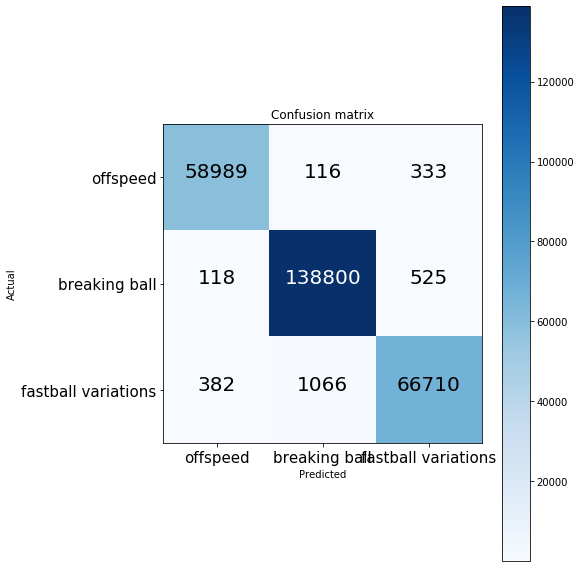

In [110]:
cnf_matrix = confusion_matrix(y_train, y_hat_train_rf,labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['offspeed', 'breaking ball', 'fastball variations'])
plt.ylim(len(cnf_matrix)-0.5,-0.5)

### AdaBoosting

In [63]:
%%time

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_hat_train_ada = ada.predict(X_train)

CPU times: user 44.3 s, sys: 2.2 s, total: 46.5 s
Wall time: 50.5 s


In [64]:
ada_acc = accuracy_score(y_train, y_hat_train_ada)
ada_pre = precision_score(y_train, y_hat_train_ada, average='micro')
ada_rec = recall_score(y_train, y_hat_train_ada, average='macro')
ada_f1 = f1_score(y_train, y_hat_train_ada, average='weighted')

print(f'Accuracy: {ada_acc}')
print(f'Precision: {ada_pre}')
print(f'Recall: {ada_rec}')
print(f'F1: {ada_f1}')

Accuracy: 0.8494676807507517
Precision: 0.8494676807507517
Recall: 0.8428468989495542
F1: 0.8502432146928849


In [65]:
ada_cv = np.mean(cross_val_score(ada, X_train, y_train, cv=5))
print('CV5: ', ada_cv)

CV5:  0.8531525071790579


### XG Boost

In [66]:
%time

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_hat_train_xgb = xgb.predict(X_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [67]:
xgb_acc = accuracy_score(y_train, y_hat_train_xgb)
xgb_pre = precision_score(y_train, y_hat_train_xgb, average='micro')
xgb_rec = recall_score(y_train, y_hat_train_xgb, average='macro')
xgb_f1 = f1_score(y_train, y_hat_train_xgb, average='weighted')

print(f'Accuracy: {xgb_acc}')
print(f'Precision: {xgb_pre}')
print(f'Recall: {xgb_rec}')
print(f'F1: {xgb_f1}')

Accuracy: 0.9127580615565517
Precision: 0.9127580615565517
Recall: 0.8975780144779258
F1: 0.9119466306678303


In [68]:
xgb_cv = np.mean(cross_val_score(xgb, X_train, y_train, cv=5))
print('CV5: ', xgb_cv)

CV5:  0.9116870348349666


### K-Nearest Neighbors

In [69]:
%time

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat_train_knn = knn.predict(X_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 23.8 µs


In [70]:
knn_acc = accuracy_score(y_train, y_hat_train_knn)
knn_pre = precision_score(y_train, y_hat_train_knn, average='micro')
knn_rec = recall_score(y_train, y_hat_train_knn, average='macro')
knn_f1 = f1_score(y_train, y_hat_train_knn, average='weighted')

print(f'Accuracy: {knn_acc}')
print(f'Precision: {knn_pre}')
print(f'Recall: {knn_rec}')
print(f'F1: {knn_f1}')

Accuracy: 0.9097135624384454
Precision: 0.9097135624384454
Recall: 0.8948723685365173
F1: 0.9091802124952543


In [71]:
knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
print('CV5: ', knn_cv)

CV5:  0.8657199438118539


### Compare Vanilla Models

In [85]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 
              'AdaBoost', 'XG Boost', 'KNN'],
    'F1 Score': [log_f1, gnb_f1, rf_f1, ada_f1, 
             xgb_f1, knn_f1], 
    'CV': [log_cv, gnb_cv, rf_cv, ada_cv, 
             xgb_cv, knn_cv]})
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score,CV
2,Random Forest,0.990477,0.919049
4,XG Boost,0.911947,0.911687
5,KNN,0.909180,0.865720
0,Logistic Regression,0.862966,0.863758
3,AdaBoost,0.850243,0.853153
1,Naive Bayes,0.081046,0.222582


## Hyperparameter Tuning

In [73]:
# gridsearch on random forest and knn, maybe xgboost
# cross validate
# confusion matrix

### Random Forest

In [74]:
# %time

# rf_weight = RandomForestClassifier()

# rf_params = {
#     'n_estimators': [10, 20, 50],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 5, 10],
#     'min_samples_split': [5, 10],
#     'min_samples_leaf': [3, 6], 
# }

# rf_grid = GridSearchCV(estimator=rf_weight, 
#                           param_grid=rf_params, 
#                           scoring='accuracy', 
#                           cv=5)

# rf_grid.fit(X_train, y_train)
# rf_grid.score(X_test, y_test)

In [75]:
# rf_grid.best_params_

### KNN

In [76]:
# knn_params = {'pca__n_components': [5,10,15,20],
#                 'knn__n_neighbors': [2,3,4,5]}

# knn_grid = GridSearchCV(estimator=knn, 
#                           param_grid=knn_params, 
#                           scoring='accuracy', 
#                           cv=5)

# knn_grid.fit(X_train, y_train)
# knn_grid.score(X_test, y_test)

### XG Boost

In [77]:
# xg_params = {
#     "learning_rate": [0.1,0.3,0.4],
#     'max_depth': [2,3,4,5],
#     'min_child_weight': [2,4,6,8],
#     'subsample': [ 0.3,0.4,0.5],
#     'n_estimators': [5, 30, 100, 250],
# }

# xg_grid = GridSearchCV(estimator=xgb, 
#                        param_grid=xg_params, 
#                        scoring='accuracy', 
#                        cv=5, n_jobs=1)

# xg_grid.fit(X_train, y_train)
# xg_grid.score(X_test, y_test)